# Теория вероятностей и математическая статистика

## Урок 4

## Непрерывные случайные величины. Функция распределения и функция плотности. Нормальное распределение. Центральная предельная теорема

### Непрерывные случайные величины

Ранее мы познакомились с дискретными случайными величинами. Такие величины принимают дискретные, т.е. разделимые значения. Разделимость заключается в том, что если случайная величина принимает, например, значения $1$ и $2$, то она не обязана принимать какие-то промежуточные значения.

__Непрерывные случайные величины__ принимают все значения, содержащиеся в заданном промежутке. Промежуток может быть конечным или бесконечным.

Например, рост или вес человека — непрерывные случайные величины: они могут принимать любое значение в некоторых пределах.

Закон распределения вероятностей дискретной случайной величины мы задавали как соответствие между значениями $a_i$ случайной величины и соответствующими вероятностями $P(X = a_i)$. 

Для непрерывных случайных величин аналогичный подход невозможен, поскольку вероятность $P(X = a)$ для непрерывной случайной величины $X$ равна $0$ для любого $a$. Поэтому распределение вероятностей непрерывных случайных величин характеризуют с помощью __функции распределения__:
$$F(x) = P(X < x)$$

Функция распределения показывает, какова для каждого $x$ вероятность того, что случайная величина $X$ принимает значение меньше $x$. (Для дискретных распределений эта функция ступенчатая.) 

Эта функция монотонно возрастает на отрезке, на котором определена случайная величина. Кроме того, $F(-\infty) = 0$ и $F(\infty) = 1$.

__Пример 1__

Рассмотрим опять данные по хоккеистам и построим по ним _эмпирическую_ (т.е. полученную опытным путём) функцию распределения возраста хоккеистов.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [2]:
df = pd.read_csv('hockey_players.csv')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [3]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

С помощью `matplotlib` построим график данной функции в пределах от $10$ до $50$.

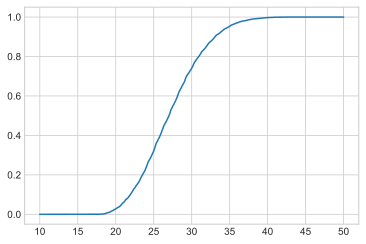

In [4]:
ox = np.linspace(10, 50, 1000)
oy = np.array([edf(df['age'], x) for x in ox])

plt.plot(ox, oy)

Всё же функция распределения не даёт представления о распределении, аналогичного тому, что даёт закон распределения дискретных случайных величин. Хотелось бы понять, какие значения случайной величины более «вероятно» наблюдать, чем другие. 

Для таких целей удобно использовать __функцию плотности__:
$$f(x) = F'(x)$$

Геометрический смысл функции плотности таков: вероятность того, что случайная величина $X$ будет лежать в отрезке $(a, b)$, равна площади под графиком функции плотности $f(x)$ в пределах от $a$ до $b$.

Общая площадь под графиком функции $f(x)$ равна $1$, аналогично тому, что сумма вероятностей значений дискретной случайной величины равна $1$.

Однако, стоит помнить, что _значение $f(x)$ не является вероятностью $P(X = x)$_. Оно лишь отражает _плотность_ случайной величины в окрестности точки $x$.

Плотность распределения можно визуализировать с помощью гистограммы, передав в неё значение параметра `density=True`.

__Пример 2__

Построим гистограмму значений возраста хоккеистов, чтобы примерно представить, как выглядит соответствующая функция плотности распределения.

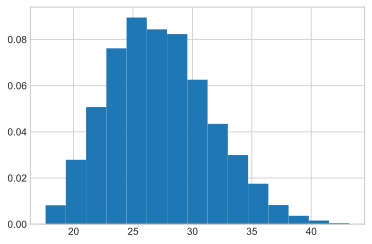

In [5]:
plt.hist(df['age'], density=True, bins=15);

Математическое ожидание и дисперсия для непрерывной случайной величины также считаются иначе, чем для дискретной. 

Формула для математического ожидания:
$$M(X) = \displaystyle\int_{-\infty}^\infty x \cdot f(x) \: dx$$

Формула для дисперсии:
$$D(X) = \displaystyle\int_{-\infty}^\infty (x - M(X))^2 \cdot f(x) \: dx$$

### Примеры непрерывных распределений

Непрерывная случайная величина $X$ имеет __нормальное распределение__ с параметрами $a$ и $\sigma > 0$, если её плотность распределения задаётся формулой
$$f(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp \left(- \frac{(x - \mu)^2}{2 \sigma^2} \right)$$

Параметры $\mu$ и $\sigma$ задают, соответственно, математическое ожидание и среднее квадратическое отклонение случайной величины:
$$M(X) = \mu, \:\: D(X) = \sigma^2$$

Нормальное распределение с параметрами $\mu = 0$ и $\sigma = 1$ называется __стандартным нормальным распределением__.

Нормальное распределение является одним из наиболее распространённых на практике. Например, нормально распределены:
* рост, вес людей
* показатели IQ
* время прихода на работу
* скорость движения молекул в жидкостях и газах

Как правило, нормально распределёнными являются случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов.

__Пример 3__

Выборку из нормального распределения можно получить с помощью функции `normal` из модуля `numpy.random`. Построим такую выборку с параметрами $\mu = 8$ (аргумент `loc`), $\sigma = 2$ (аргумент `scale`).

In [6]:
loc = 8
scale = 2

samples = np.random.normal(loc, scale, size=10000)

print(samples)

[ 6.62890367  9.05879867  5.14827293 ...  8.1423877   8.31148803
 10.55033103]


In [7]:
len(samples) == len(set(samples))

True

In [8]:
len(samples), len(set(samples))

(10000, 10000)

Выборочные мат. ожидание и дисперсия:

In [9]:
samples.mean(), samples.var(ddof=1)

(8.010557473949333, 3.96350511831769)

__Пример 4__

Гистограмма выборки и теоретическая функция плотности:

In [10]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

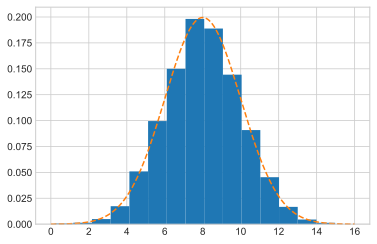

In [11]:
ox = np.linspace(0, 16, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy, linestyle='dashed')

### `scipy.stats`

В модуле `stats` из библиотеки `scipy` содержатся реализации основных функций для различных распределений:
* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `geom` — геометрическое,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное

и др. 

Доступные функции:
* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения)

и др. Например, с помощью этого модуля можно получить значения функции нормального распределения, которая не вычисляется аналитически и доступна лишь численно.

In [16]:
from scipy import stats

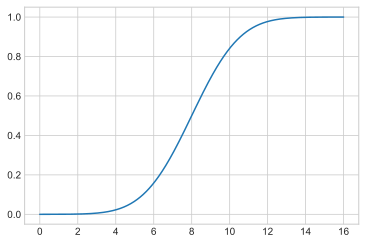

In [17]:
ox = np.linspace(0, 16, 1000)
oy = stats.norm.cdf(ox, loc=8, scale=2)  # в качестве аргумента `x` можно подставлять массив

plt.plot(ox, oy)

При многократном использовании функций одного и того же распределения удобнее сразу зафиксировать объект:

In [18]:
norm = stats.norm(loc=8, scale=2)

norm

In [19]:
norm.pdf(6), norm.cdf(6), norm.ppf(0.16)

(0.12098536225957168, 0.15865525393145707, 6.011084233580494)

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* Интервал от $\mu - \sigma$ до $\mu + \sigma$ (__стандартное отклонение__) содержит около $68\%$ вероятностной массы (т.е. с вероятностью $68\%$ данная величина попадает в этот интервал).
* От $\mu - 2\sigma$ до $\mu + 2\sigma$ — около $95\%$ массы (__правило двух сигм__).
* От $\mu - 3\sigma$ до $\mu + 3\sigma$ — около $99.7\%$ массы (__правило трёх сигм__).

__Пример 5__

Для сгенерированной выборки из нормального распределения проверим правила отклонения. Заодно посчитаем точные значения вероятностей попасть в каждый из этих интервалов. Если имеется функция распределения $F(x)$, то вероятность попасть в интервал $(a, b)$ посчитать легко:
$$P(a < X < b) = F(b) - F(a)$$

Итак, для одной, двух и трёх сигм посчитаем:
1. долю элементов из выборки, содержащихся в этом интервале,
2. теоретическую вероятность попасть в этот интервал.

In [20]:
for n in range(1, 4):
    proba = stats.norm.cdf(n) - stats.norm.cdf(-n)
    
    mask = (samples > loc - n * scale) & (samples < loc + n * scale)
    frac = samples[mask].shape[0] / samples.shape[0]
    
    print(f'Для {n} сигм(ы):\n', f'\tвероятность:\t{proba}\n', f'\tдоля в выборке:\t{frac}')

Для 1 сигм(ы):
 	вероятность:	0.6826894921370859
 	доля в выборке:	0.6798
Для 2 сигм(ы):
 	вероятность:	0.9544997361036416
 	доля в выборке:	0.9571
Для 3 сигм(ы):
 	вероятность:	0.9973002039367398
 	доля в выборке:	0.9973


__Пример 6__

Вернёмся к данным о хоккеистах и рассмотрим столбец с ростом. Построим его гистограмму.

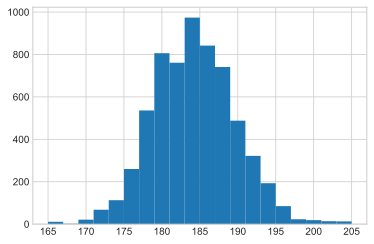

In [21]:
plt.hist(df['height'], bins=20);

Мы знаем, что рост — одна из величин, которая может распределяться нормально. Восстановим по выборке значения $\mu$ и $\sigma$ и построим поверх гистограммы теоретическую функцию плотности соответствующего нормального распределения.

In [22]:
loc = df['height'].mean()
scale = df['height'].std(ddof=1)

loc, scale

(183.81150667514305, 5.3838577104380105)

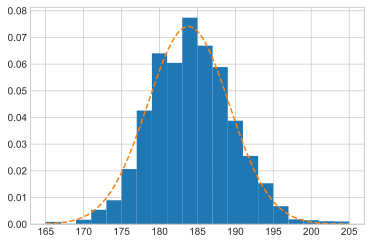

In [23]:
ox = np.linspace(165, 205, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['height'], density=True, bins=20)
plt.plot(ox, oy, linestyle='dashed')

Также построим эмпирическую и теоретическую функции распределения для роста.

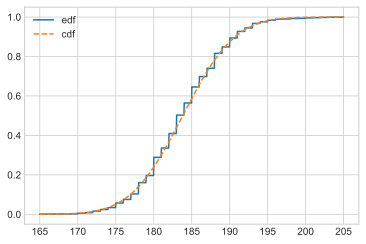

In [24]:
ox = np.linspace(165, 205, 1000)
oy1 = np.array([edf(df['height'], x) for x in ox])
oy2 = stats.norm.cdf(ox, loc=loc, scale=scale)

plt.plot(ox, oy1, label='edf')
plt.plot(ox, oy2, linestyle='dashed', label='cdf')

plt.legend()

Эмпирическая функция распределения получилась ступенчатой. Это связано с тем, что в нашем датасете значения роста округлены до целых:

In [25]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Проверим правила отклонения на выборке роста хоккеистов.

In [26]:
for n in range(1, 4):
    mask = (df['height'] > loc - n * scale) & (df['height'] < loc + n * scale)

    print(f'Вероятность для {n} сигм(ы):', df[mask].shape[0] / df.shape[0])

Вероятность для 1 сигм(ы): 0.687857596948506
Вероятность для 2 сигм(ы): 0.951048951048951
Вероятность для 3 сигм(ы): 0.9915766052129689


__Другие непрерывные распределения__

* __Экспоненциальное__ (или __показательное__) распределение (`scipy.stats.expon`): время между последовательными свершениями одного и того же события. Является непрерывным аналогом геометрического распределения. Функция плотности:
$$
    f(x) = \begin{cases}
    \lambda e^{- \lambda x}, & x \geq 0, \\
    0, & x < 0.
    \end{cases}
$$
* __Непрерывное равномерное__ распределение (`scipy.stats.uniform`) — непрерывный аналог дискретного равномерного распределения. Функция плотности постоянна внутри отрезка:
$$
    f(x) = \begin{cases}
    1 / (b - a), & x \in [ a, b ], \\
    0 & \text{иначе}.
    \end{cases}
$$
* Распределение Стьюдента (`scipy.stats.t`)
* Распределение Фишера (`scipy.stats.f`).
* Распределение $\chi^2$ (хи-квадрат, `scipy.stats.chi2`).
* Распределение Колмогорова (`scipy.stats.ksone`).

Кстати, про распределение Стьюдента (оно нам ещё не раз пригодится в будущем) есть раздел в дополнительных материалах к уроку.

### Центральная предельная теорема

Нормальное распределение обладает свойством __устойчивости__. Это означает, что с нормальными распределениями можно проводить различные арифметические операции (такие как сложение, вычитание, умножение на константы), и нормальное распределение останется нормальным.

Большинство других распределений таковыми не являются. Например, на втором уроке мы рассматривали распределение суммы значений двух подбрасываемых игральных кубиков. Распределение значений каждого кубика отдельно является дискретным равномерным, но их сумма уже не имеет равномерное распределение. 

Оказывается, если суммировать неустойчивые распределения, то с ростом слагаемых результат становится всё более похож на нормальное распределение.

Пусть имеется $n$ случайных величин $X_1, \dots, X_n$, имеющих одинаковое распределение с математическим ожиданием $M$ и дисперсией $D$. Пусть $Y = X_1 + \dots + X_n$ — случайная величина, равная сумме этих значений. 

__Центральная предельная теорема__ утверждает: чем больше $n$, тем _ближе_ распределение величины $Y$ к нормальному распределению с параметрами
$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$

_Другая версия_ этой теоремы: пусть $Z = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n X_i$ — среднее арифметическое случайных величин. Тогда с увеличением $n$ распределение этой величины становится всё ближе к нормальному распределению с параметрами
$$\mu = M, \:\: \sigma^2 = D / n$$

Центральная предельная теорема согласуется со сделанным ранее наблюдением, что, как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.

__Зачем это нужно__

В реальных ситуациях у нас нет возможности генерировать большое количество выборок. Как правило, у нас есть только одна. Вычисляя, например, выборочное среднее, мы получим только одно значение. Зачем тогда нужна центральная предельная теорема?

ЦПТ позволяет пролить свет на распределение этого самого выборочного среднего. Т.е. благодаря ЦПТ, мы знаем, какие значения выборочного среднего __можно ожидать__, будь у нас ещё одна или несколько выборок. 

Сравнение ожидаемых и наблюдаемых значений является ключевым моментом при проверке статистических гипотез, о которых мы поговорим на следующем уроке. 